In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.WARNING)
import shnitsel as st
from shnitsel.vis.datasheet import Datasheet

## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v3.0/', parallel=False)  # type: ignore
shnitsel_db.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 1,
            traj.state_charges.attrs,
        )
    )


shnitsel_db = shnitsel_db.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db

  0%|          | 0/2 [00:00<?, ?it/s]

[13:48:02] WARNING: Proton(s) added/removed



C=[NH2+] InChI=1S/CH3N/
c1-2/h2H,1H2/p+1


{'/unknown/aggregate of subtree(unknown)': <Figure size 827x974.167 with 15 Axes>}

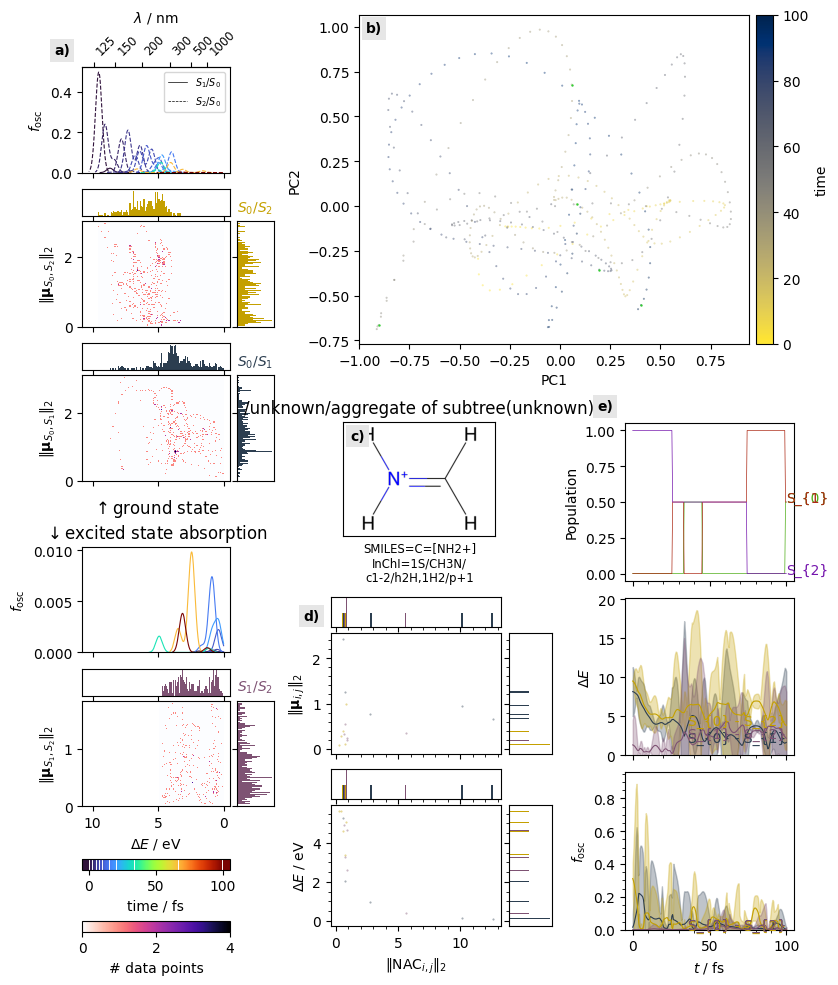

In [3]:
sheet = Datasheet(shnitsel_db)
# sheet.datasheet_pages['root'].charge = 1
sheet.plot()
# sheet.datasheet_pages

In [ ]:
%time sheet.calc_all()

In [ ]:
%time sheet.plot_per_state_histograms()

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)
    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')